In [332]:
import pandas as pd

In [357]:
evaluation_dataset_path_1 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-21_18-31-20/evaluation_dataset.json"
df_eval_1 = pd.read_json(evaluation_dataset_path_1)
df_eval_1["experiment_name"] = "baseline_v1.0_gemini-2.0-flash"

evaluation_dataset_path_2 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-23_11-26-44/evaluation_dataset.json"
df_eval_2 = pd.read_json(evaluation_dataset_path_2)
df_eval_2["experiment_name"] = "sparql_construction_v1.1_gemini-2.0-flash"

evaluation_dataset_path_3 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_02-04-22/evaluation_dataset.json"
df_eval_3 = pd.read_json(evaluation_dataset_path_3)
df_eval_3["experiment_name"] = "baseline_v1.0_gemini-2.5-flash"

evaluation_dataset_path_4 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_16-27-37/evaluation_dataset.json"
df_eval_4 = pd.read_json(evaluation_dataset_path_4)
df_eval_4["experiment_name"] = "sparql_construction_v1.1_gemini-2.5-flash"

evaluation_dataset_path_5 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_17-38-49/evaluation_dataset.json"
df_eval_5 = pd.read_json(evaluation_dataset_path_5)
df_eval_5["experiment_name"] = "cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash"

evaluation_dataset_path_6 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_19-28-07/evaluation_dataset.json"
df_eval_6 = pd.read_json(evaluation_dataset_path_6)
df_eval_6["experiment_name"] = "cot_vanilla_v1.0_construction_v1.0_gemini-2.0-flash"

evaluation_dataset_path_7 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_21-44-48/evaluation_dataset.json"
df_eval_7 = pd.read_json(evaluation_dataset_path_7)
df_eval_7["experiment_name"] = "cot_vanilla_v1.0_construction_v1.1_gemini-2.0-flash"

evaluation_dataset_path_8 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-23_10-26-29/evaluation_dataset.json"
df_eval_8 = pd.read_json(evaluation_dataset_path_8)
df_eval_8["experiment_name"] = "cot_vanilla_v1.0_construction_v1.1_gemini-2.5-flash"

# evaluation_dataset_path_9 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-23_13-45-00/evaluation_dataset.json"
# df_eval_9 = pd.read_json(evaluation_dataset_path_9)
# df_eval_9["experiment_name"] = "cot_vanilla_v1.0_construction_v1.0_gemini-2.5-flash"

df = pd.concat([df_eval_1, df_eval_2, df_eval_3, df_eval_4, df_eval_5, df_eval_6, df_eval_7, df_eval_8], ignore_index=True)

df["evaluation_timestamp"] = pd.to_datetime(df["evaluation_timestamp"])
df["validity_flag"] = np.where(df["is_valid_sparql"], "valid", "invalid")


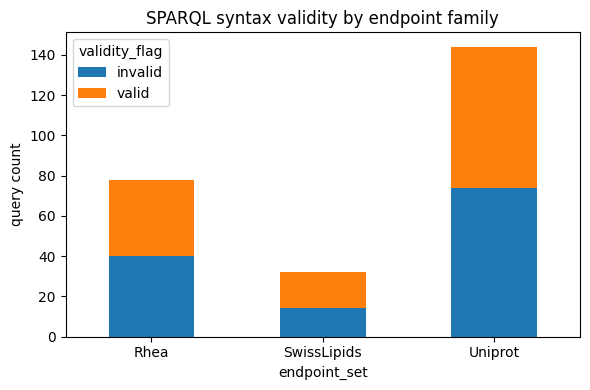

In [358]:
ct = df.groupby(["endpoint_set", "validity_flag"]).size().unstack(fill_value=0)
ct.plot(kind="bar", stacked=True, figsize=(6,4))
plt.ylabel("query count")
plt.title("SPARQL syntax validity by endpoint family")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [359]:
valid_counts = (
    df.groupby("experiment_name")["is_valid_sparql"]
            .agg(total="size", n_valid="sum")
            .reset_index()
            .sort_values("n_valid")
)

print(valid_counts)

                                     experiment_name  total  n_valid
0                     baseline_v1.0_gemini-2.0-flash     32        0
2     cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash     32        0
3  cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...     32       13
4  cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...     32       16
6          sparql_construction_v1.1_gemini-2.0-flash     32       23
1                     baseline_v1.0_gemini-2.5-flash     32       24
7          sparql_construction_v1.1_gemini-2.5-flash     31       24
5  cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...     31       26


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_64354/1400190658.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experiment_name", y="n_valid", data=valid_counts, palette="Blues_d")


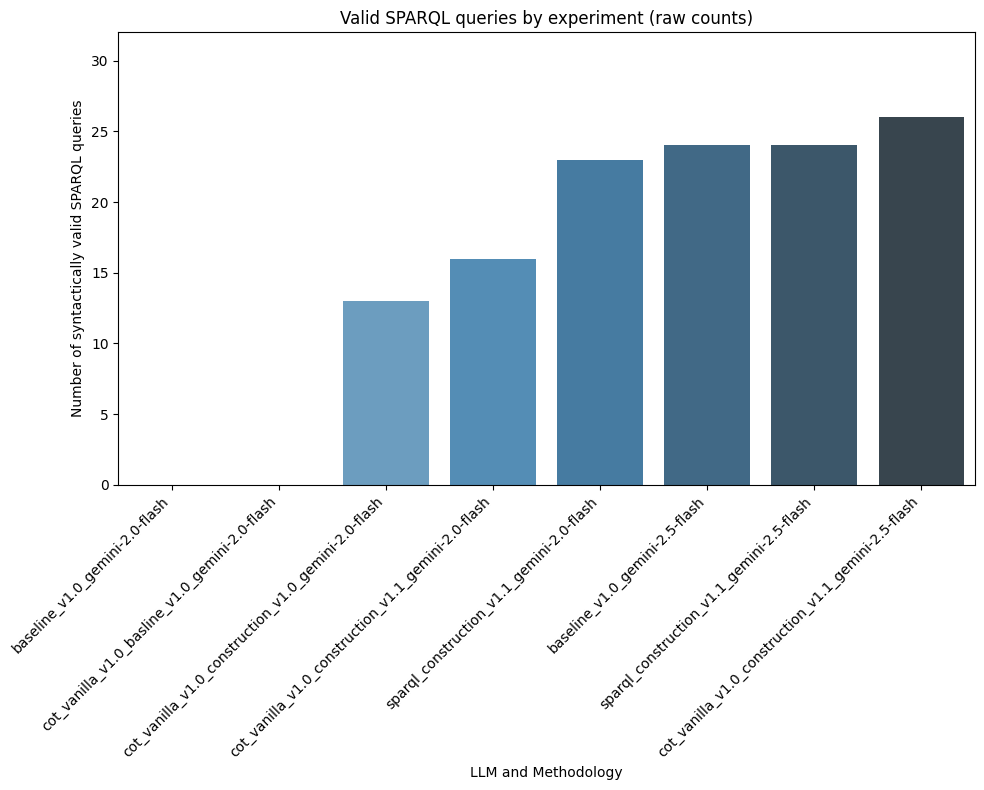

In [360]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
sns.barplot(x="experiment_name", y="n_valid", data=valid_counts, palette="Blues_d")
plt.ylabel("Number of syntactically valid SPARQL queries")
plt.title("Valid SPARQL queries by experiment (raw counts)")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel("LLM and Methodology")
plt.tight_layout()
plt.ylim(0,32)
plt.show()

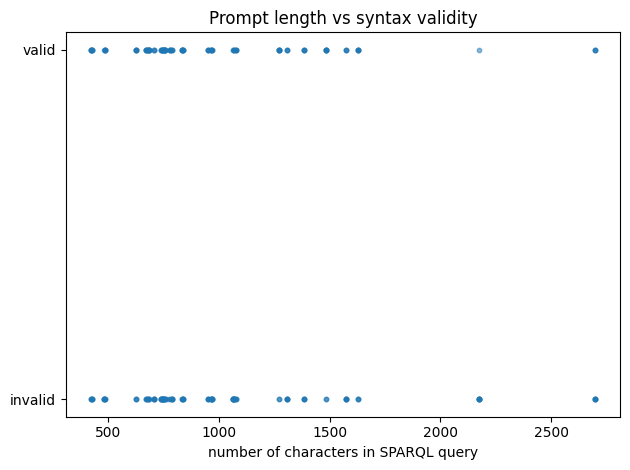

In [361]:
plt.scatter(df["ground_truth_query"].str.len(),
            df["is_valid_sparql"].astype(int),
            alpha=0.5, s=10)
plt.yticks([0,1], ["invalid","valid"])
plt.xlabel("number of characters in SPARQL query")
plt.title("Prompt length vs syntax validity")
plt.tight_layout()
plt.show()


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_64354/755679332.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


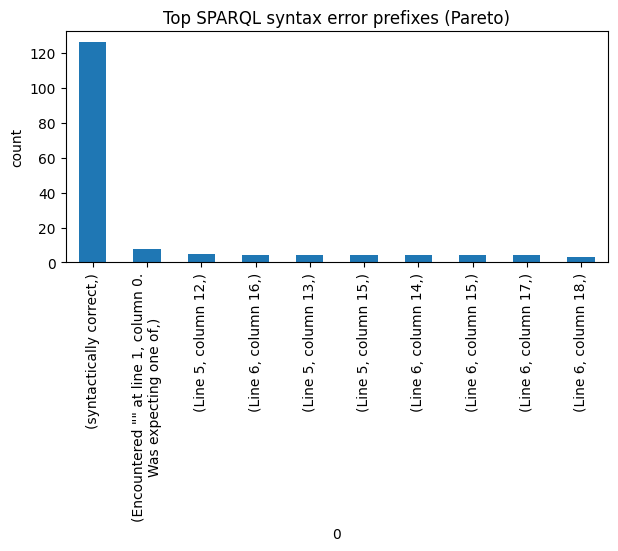

In [362]:
syntax_df = df[df["sparql_syntax_error"].notna()]
top_err = (syntax_df["sparql_syntax_error"]
           .str.extract(r"^([^:]+)")        # substring before first colon
           .value_counts()
           .head(10))
top_err.plot(kind="bar", figsize=(7,3))
plt.ylabel("count")
plt.title("Top SPARQL syntax error prefixes (Pareto)")
plt.tight_layout()
plt.show()


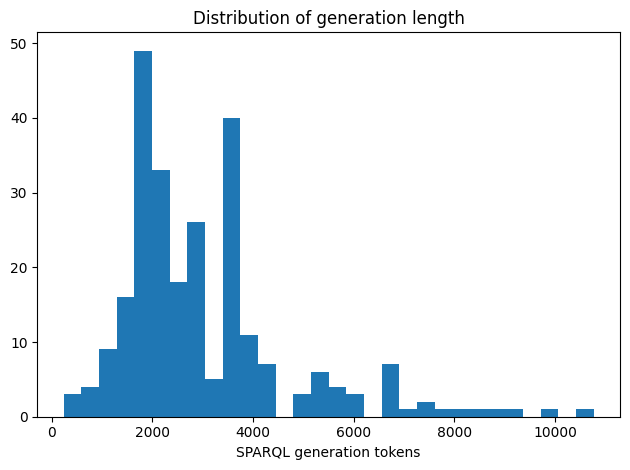

In [363]:
plt.hist(df["sparql_construction_total_tokens"], bins=30)
plt.xlabel("SPARQL generation tokens")
plt.title("Distribution of generation length")
plt.tight_layout()
plt.show()


In [364]:
valid_summary = (
    combined_df.groupby("experiment_name")["is_valid_sparql"]
            .agg(total="size", n_valid="sum")
            .assign(syntactically_valid=lambda x: 100 * x.n_valid / x.total)
            .reset_index()
            .sort_values("syntactically_valid")
)

print(valid_summary)

                                  experiment_name  total  n_valid  \
0                  baseline_v1.0_gemini-2.0-flash     32        0   
2  cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash     32        0   
3       sparql_construction_v1.1_gemini-2.0-flash     32       18   
1                  baseline_v1.1_gemini-2.5-flash     32       24   
4       sparql_construction_v1.1_gemini-2.5-flash     31       24   

   syntactically_valid  
0             0.000000  
2             0.000000  
3            56.250000  
1            75.000000  
4            77.419355  


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_64354/3783807721.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experiment_name", y="syntactically_valid", data=valid_summary, palette="Blues_d")


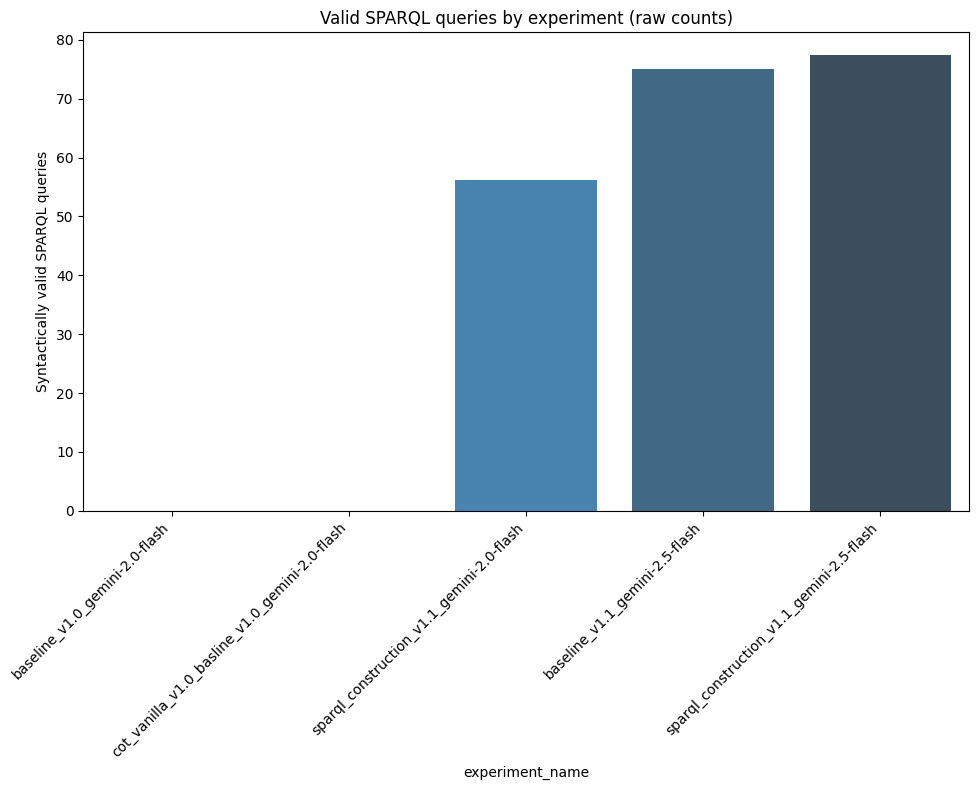

In [365]:
plt.figure(figsize=(10, 8))
sns.barplot(x="experiment_name", y="syntactically_valid", data=valid_summary, palette="Blues_d")
plt.ylabel("Syntactically valid SPARQL queries")
plt.title("Valid SPARQL queries by experiment (raw counts)")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [366]:
valid_summary = (
    df.groupby("experiment_name")["error_occured_at_endpoint"]
            .agg(total="size", n_valid="sum")
            .assign(error_occured_at_endpoint=lambda x: 100 * x.n_valid / x.total)
            .reset_index()
            .sort_values("error_occured_at_endpoint", ascending=False)
)

print(valid_summary)

                                     experiment_name  total  n_valid  \
0                     baseline_v1.0_gemini-2.0-flash     32       32   
2     cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash     32       32   
4  cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...     32       25   
3  cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...     32       23   
7          sparql_construction_v1.1_gemini-2.5-flash     31       21   
1                     baseline_v1.0_gemini-2.5-flash     32       19   
5  cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...     31       15   
6          sparql_construction_v1.1_gemini-2.0-flash     32        8   

   error_occured_at_endpoint  
0                 100.000000  
2                 100.000000  
4                  78.125000  
3                  71.875000  
7                  67.741935  
1                  59.375000  
5                  48.387097  
6                  25.000000  


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_64354/3229745019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="experiment_name", y="error_occured_at_endpoint", data=valid_summary, palette="Blues_d")


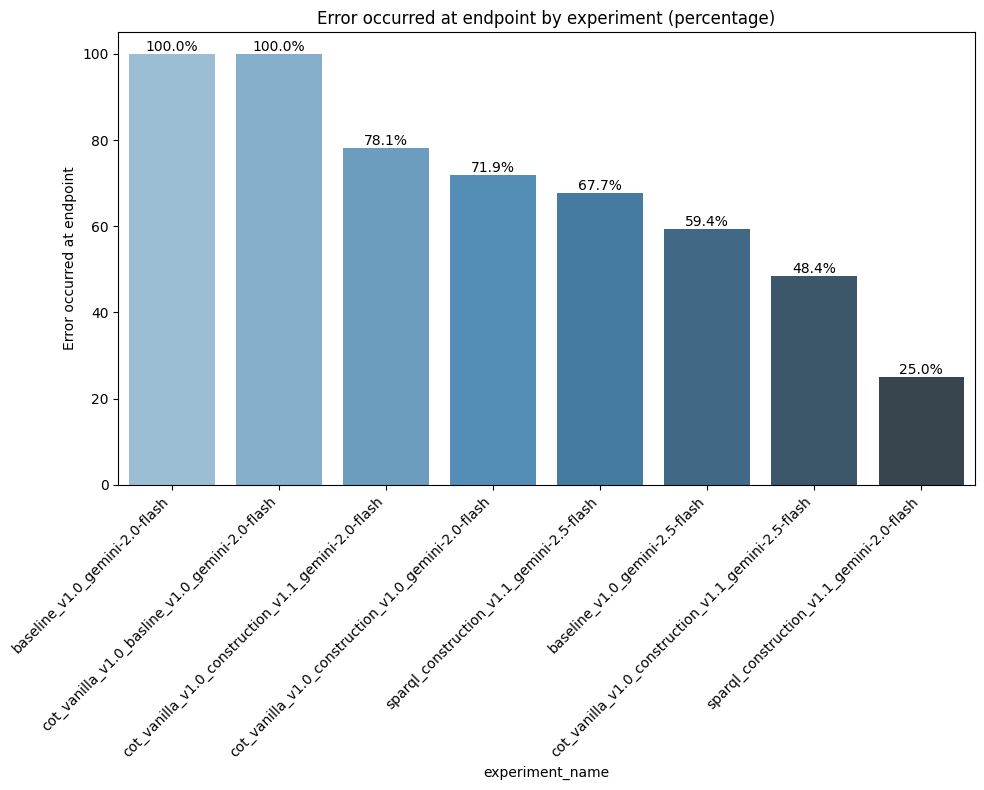

In [367]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="experiment_name", y="error_occured_at_endpoint", data=valid_summary, palette="Blues_d")
plt.ylabel("Error occurred at endpoint")
plt.title("Error occurred at endpoint by experiment (percentage)")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Add percentage labels manually
for p in ax.patches:
    height = p.get_height()
    # If height is a fraction, multiply by 100
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.show()

In [368]:
valid_summary = (
    df
    .groupby("experiment_name")
    .agg(
        total=("error_occured_at_endpoint_message", "size"),
        n_valid=("error_occured_at_endpoint_message", lambda x: (x == "no error, but empty result").sum())
    )
    .reset_index()
    .sort_values("n_valid", ascending=False)  # Sort from most to least
)

print(valid_counts)

                                     experiment_name  total  n_valid
0                     baseline_v1.0_gemini-2.0-flash     32        0
2     cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash     32        0
3  cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...     32       13
4  cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...     32       16
6          sparql_construction_v1.1_gemini-2.0-flash     32       23
1                     baseline_v1.0_gemini-2.5-flash     32       24
7          sparql_construction_v1.1_gemini-2.5-flash     31       24
5  cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...     31       26


In [369]:
# Count how many times each message appears per experiment
valid_counts = (
    df
    .groupby(["experiment_name", "error_occured_at_endpoint_message"])
    .size()
    .reset_index(name='count')
)
valid_counts = valid_counts.sort_values("count", ascending=True)
valid_counts = valid_counts[valid_counts["error_occured_at_endpoint_message"] == "no error, but empty result"]

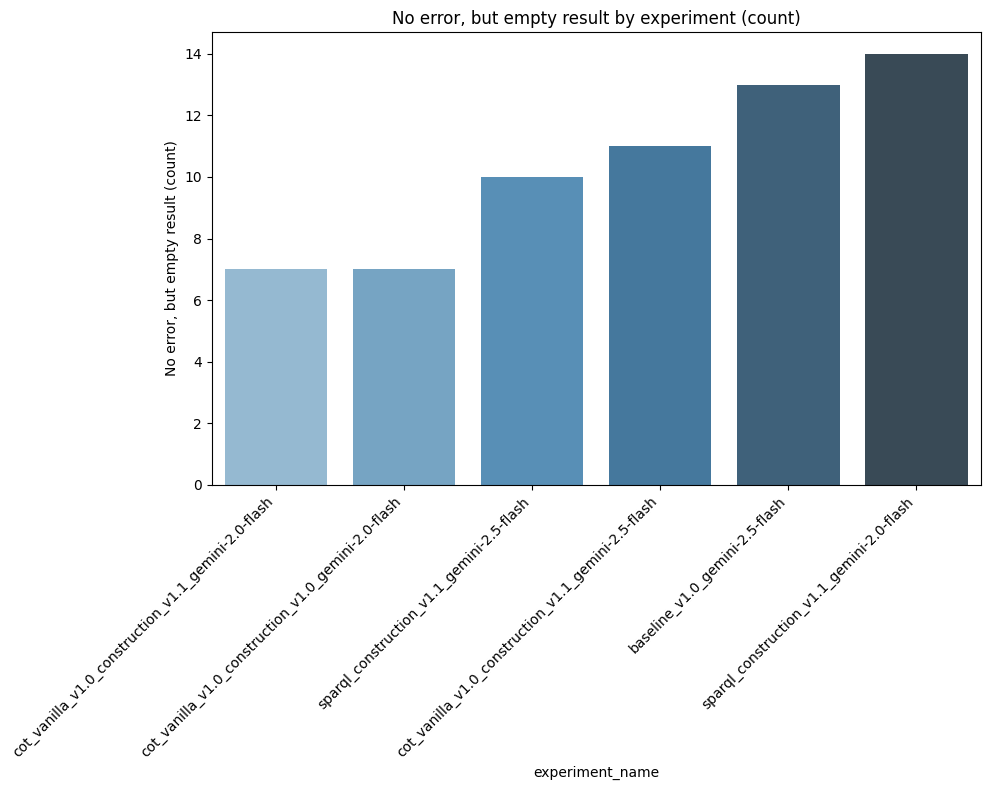

In [370]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x="experiment_name",
    y="count",
    hue="experiment_name",        # add this line
    data=valid_counts,
    palette="Blues_d",
    legend=False                  # add this line
)
plt.ylabel("No error, but empty result (count)")
plt.title("No error, but empty result by experiment (count)")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [371]:
df_error = df[df["is_valid_sparql"] == True]

# Total error count per experiment
total_errors = (
    df_error
    .groupby("experiment_name")
    .size()
    .reset_index(name="total_errors_on_endpoint")
)

# "No error, but empty result" count per experiment
empty_result_counts = (
    df_error[df_error["error_occured_at_endpoint_message"] == "no error, but empty result"]
    .groupby("experiment_name")
    .size()
    .reset_index(name="empty_result_count")
)


# Merge the two counts
summary = pd.merge(total_errors, empty_result_counts, on="experiment_name", how="left")
summary["empty_result_count"] = summary["empty_result_count"].fillna(0)



# Calculate percentage
summary["percentage_empty_result"] = summary["empty_result_count"] / summary["total_errors_on_endpoint"] * 100

summary.head()


,experiment_name,total_errors_on_endpoint,empty_result_count,percentage_empty_result
0,baseline_v1.0_gemini-2.5-flash,24,13,54.166667
1,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,13,7,53.846154
2,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,16,7,43.750000
3,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,26,11,42.307692
4,sparql_construction_v1.1_gemini-2.0-flash,23,14,60.869565


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_64354/3392396944.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


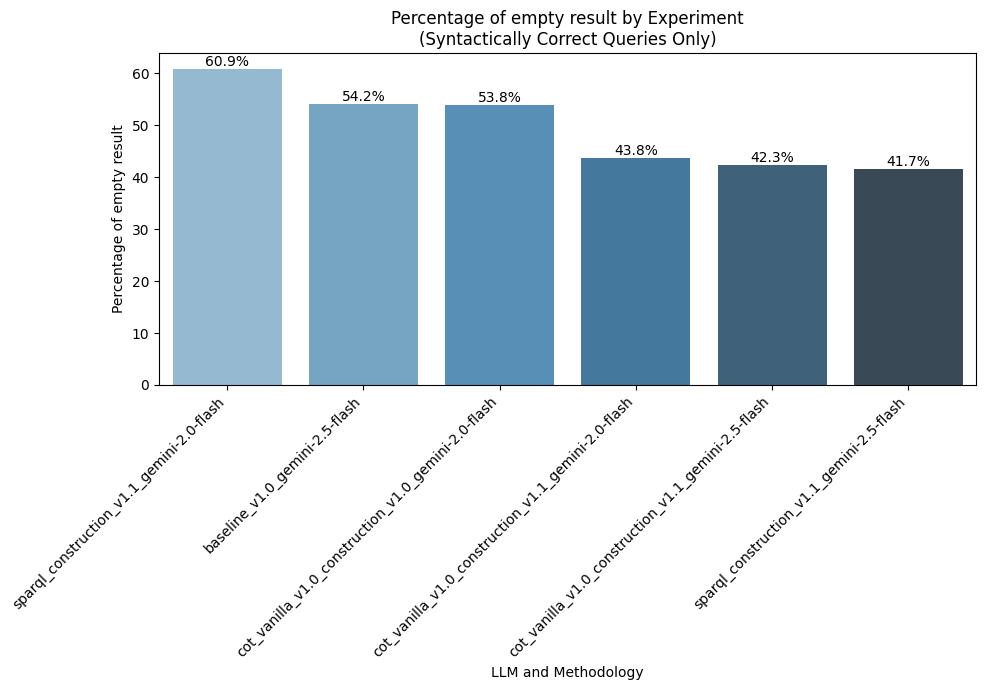

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by percentage for a clearer plot
summary_sorted = summary.sort_values("percentage_empty_result", ascending=False)

plt.figure(figsize=(10, 7))
ax = sns.barplot(
    x="experiment_name",
    y="percentage_empty_result",
    data=summary_sorted,
    palette="Blues_d"
)
plt.ylabel('Percentage of empty result')
plt.xlabel('LLM and Methodology')
plt.title('Percentage of empty result by Experiment\n(Syntactically Correct Queries Only)')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Optionally annotate bars with the percentage
for p in ax.patches:
    height = p.get_height()
    # If height is a fraction, multiply by 100
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

In [373]:
df_valid_at_endpoint = df[(df["is_valid_sparql"] == True) & (df["error_occured_at_endpoint"] == False)]

df_error = df[df["is_valid_sparql"] == True]

# Total error count per experiment
total_errors = (
    df_error
    .groupby("experiment_name")
    .size()
    .reset_index(name="total_errors_on_endpoint")
)

total_valid_at_endpoint = (
    df_valid_at_endpoint
    .groupby("experiment_name")
    .size()
    .reset_index(name="total_valid_at_endpoint")
)

# Merge the two counts
summary = pd.merge(total_errors, total_valid_at_endpoint, on="experiment_name", how="left")



# Calculate percentage
summary["percentage_valid_at_endpoint"] = summary["total_valid_at_endpoint"] / summary["total_errors_on_endpoint"] * 100

summary.head()

,experiment_name,total_errors_on_endpoint,total_valid_at_endpoint,percentage_valid_at_endpoint
0,baseline_v1.0_gemini-2.5-flash,24,13,54.166667
1,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,13,9,69.230769
2,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,16,7,43.750000
3,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,26,11,42.307692
4,sparql_construction_v1.1_gemini-2.0-flash,23,15,65.217391


In [374]:
total_valid_at_endpoint.head()

,experiment_name,total_valid_at_endpoint
0,baseline_v1.0_gemini-2.5-flash,13
1,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,9
2,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,7
3,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,11
4,sparql_construction_v1.1_gemini-2.0-flash,15


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_64354/182583925.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


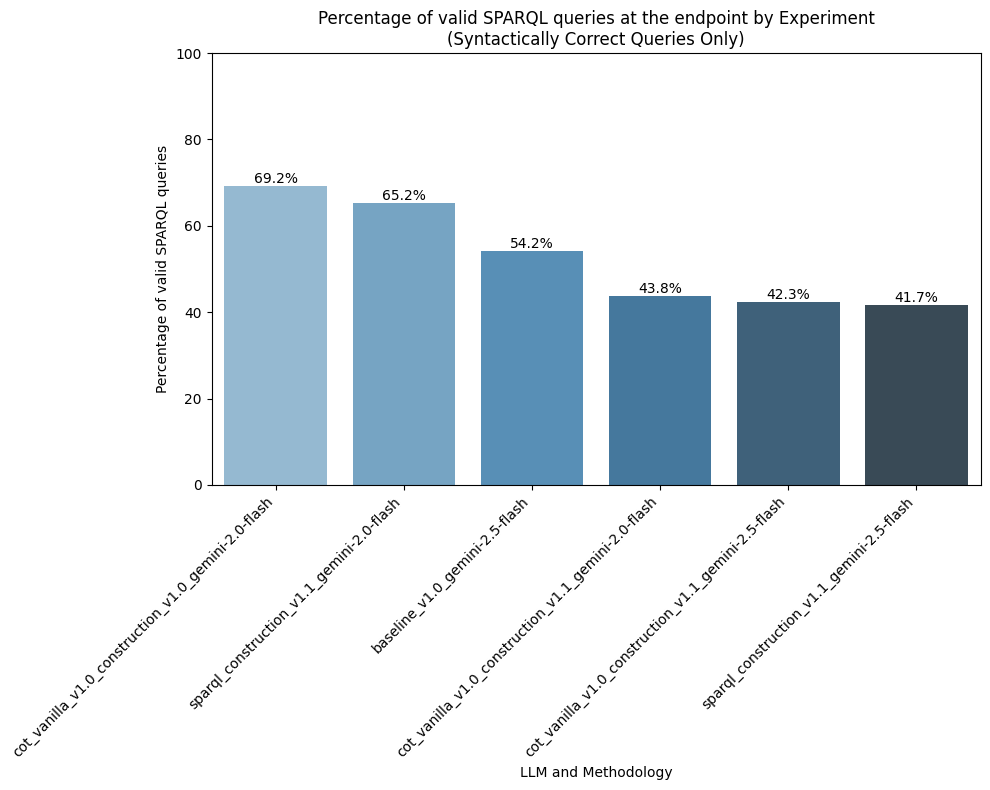

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by percentage for a clearer plot
summary_sorted = summary.sort_values("percentage_valid_at_endpoint", ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x="experiment_name",
    y="percentage_valid_at_endpoint",
    data=summary_sorted,
    palette="Blues_d"
    
)
plt.ylabel('Percentage of valid SPARQL queries')
plt.xlabel('LLM and Methodology')
plt.title('Percentage of valid SPARQL queries at the endpoint by Experiment\n(Syntactically Correct Queries Only)')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)

# Optionally annotate bars with the percentage
for p in ax.patches:
    height = p.get_height()
    # If height is a fraction, multiply by 100
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

In [376]:
target_endpoint_summary = (
    df.groupby("experiment_name")["predicted_endpoint_equal_to_target_endpoint"]
            .agg(total="size", n_valid="sum")
            .assign(predicted_endpoint_equal_to_target_endpoint=lambda x: 100 * x.n_valid / x.total)
            .reset_index()
            .sort_values("predicted_endpoint_equal_to_target_endpoint", ascending=True)
)

In [377]:
target_endpoint_summary

,experiment_name,total,n_valid,predicted_endpoint_equal_to_target_endpoint
0,baseline_v1.0_gemini-2.0-flash,32,6,18.750000
1,baseline_v1.0_gemini-2.5-flash,32,8,25.000000
2,cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash,32,14,43.750000
7,sparql_construction_v1.1_gemini-2.5-flash,31,14,45.161290
5,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,31,15,48.387097
3,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,32,22,68.750000
4,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,32,22,68.750000
6,sparql_construction_v1.1_gemini-2.0-flash,32,27,84.375000


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_64354/976670890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


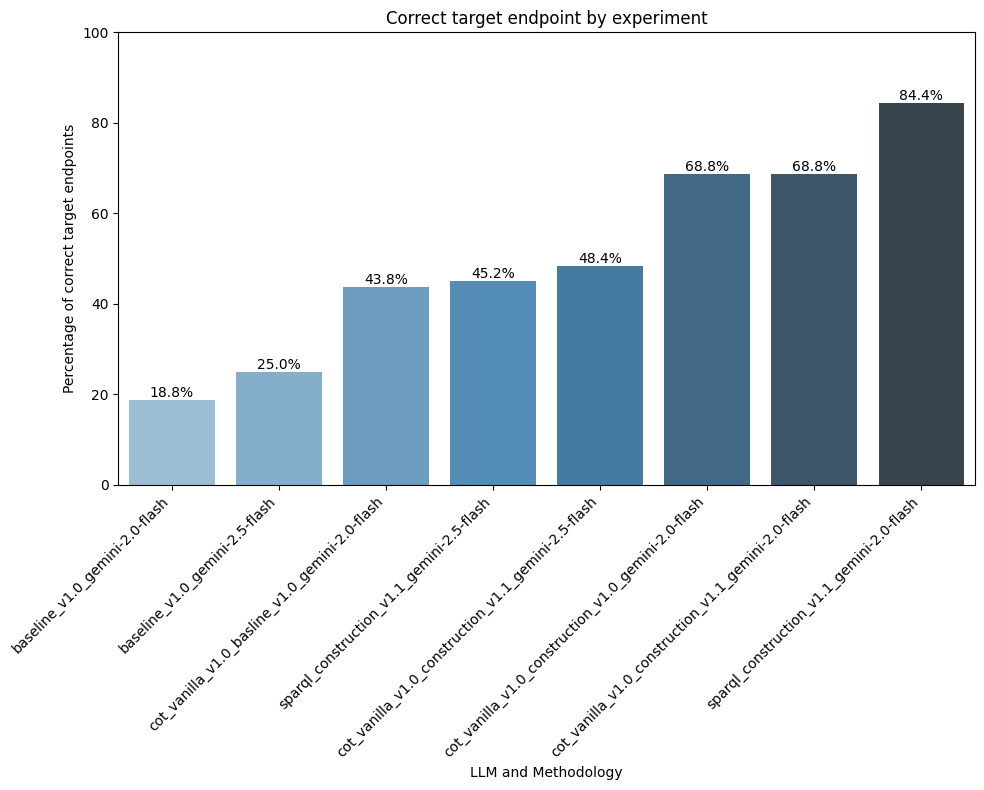

In [378]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x="experiment_name",
    y="predicted_endpoint_equal_to_target_endpoint",
    data=target_endpoint_summary,
    palette="Blues_d"
    
)
plt.ylabel('Percentage of correct target endpoints')
plt.xlabel('LLM and Methodology')
plt.title('Correct target endpoint by experiment')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)

# Optionally annotate bars with the percentage
for p in ax.patches:
    height = p.get_height()
    # If height is a fraction, multiply by 100
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

In [379]:
target_endpoint_summary = (
    df.groupby("experiment_name")["predicted_endpoint_or_federated_endpoint"]
            .agg(total="size", n_valid="sum")
            .assign(predicted_endpoint_or_federated_endpoint=lambda x: 100 * x.n_valid / x.total)
            .reset_index()
            .sort_values("predicted_endpoint_or_federated_endpoint", ascending=True)
)

/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_64354/2127437961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


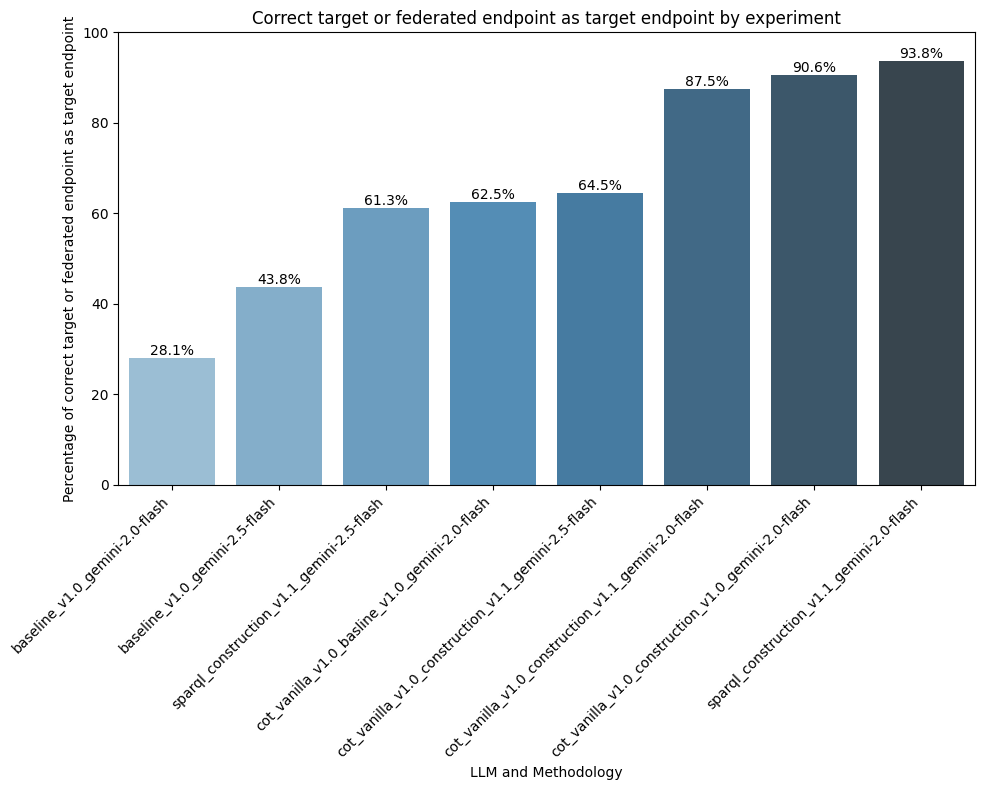

In [380]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x="experiment_name",
    y="predicted_endpoint_or_federated_endpoint",
    data=target_endpoint_summary,
    palette="Blues_d"
    
)
plt.ylabel('Percentage of correct target or federated endpoint as target endpoint')
plt.xlabel('LLM and Methodology')
plt.title('Correct target or federated endpoint as target endpoint by experiment')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)

# Optionally annotate bars with the percentage
for p in ax.patches:
    height = p.get_height()
    # If height is a fraction, multiply by 100
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()